In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
import statistics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from classification_utils import *
import pickle

In [2]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)

In [3]:
data.head()

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.037879,0.190903,0.232481,0.037879,0.190903
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.049587,0.217090,0.284639,0.024793,0.155495
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,53,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.165387,0.530838,0.669155,0.826239,13.034008
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.056365,0.243387,0.317182,0.016772,0.142619


In [4]:
#a descrption of the dataset
data.describe()

,bot,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
count,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,0.531456,5148.794751,67.100135,15.045892,0.031045,0.329076,0.088484,0.001967,0.023941,0.084281,0.365536,0.385427,1.357545,14.574041
std,0.499031,18496.606420,12.755296,2.454106,0.053379,0.315589,0.070828,0.007796,0.068508,0.109621,0.408358,0.390777,2.827068,23.390000
min,0.000000,0.000000,32.500000,9.644166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,53.000000,59.686796,13.553296,0.000000,0.010260,0.045455,0.000000,0.000000,0.017751,0.136692,0.119116,0.010526,0.104251
50%,1.000000,57.000000,65.340909,14.694444,0.005109,0.300971,0.070423,0.000000,0.000000,0.045752,0.230747,0.268594,0.043478,0.238606
75%,1.000000,2041.000000,74.254999,16.772205,0.037445,0.450781,0.113295,0.000000,0.000000,0.088862,0.451218,0.491767,0.949402,24.144412
max,1.000000,399555.000000,104.449541,22.000000,0.287760,1.210354,0.337268,0.044444,0.333767,0.529903,2.183383,1.723913,12.902439,198.461303


In [5]:
#check if there is any null value
data.isnull().values.any()

False

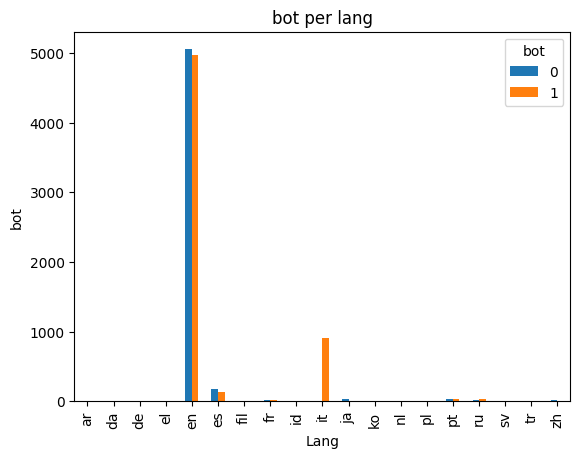

In [6]:
plot_lang_hist(data)

In [7]:
data = data.join(pd.get_dummies(data["lang"]))

In [8]:
train_set, test_set, train_label, test_label = prepare_data(data)

Classification features : ['created_at', 'statuses_count', 'avg_length', 'avg_special_chars', 'urls_ratio', 'mentions_ratio', 'hashtags_ratio', 'reply_count_mean', 'reply_count_std', 'favorite_count_mean', 'favorite_count_std', 'favorite_count_entropy', 'retweet_count_mean', 'retweet_count_std', 'ar', 'da', 'de', 'el', 'en', 'es', 'fil', 'fr', 'id', 'it', 'ja', 'ko', 'nl', 'pl', 'pt', 'ru', 'sv', 'tr', 'zh']


In [9]:
train_set.head()

,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,...,it,ja,ko,nl,pl,pt,ru,sv,tr,zh
792459126,1504302145,4707,82.408367,18.085657,0.005109,0.919323,0.001494,0.0,0.000000,0.036355,...,0,0,0,0,0,0,0,0,0,0
2377028120,1552134038,33,61.344444,13.900000,0.000000,0.400000,0.022222,0.0,0.000000,0.022222,...,0,0,0,0,0,0,0,0,0,0
616755311,1498450898,61,60.652174,12.956522,0.000000,0.000000,0.144928,0.0,0.329212,0.014493,...,0,0,0,0,0,0,0,0,0,0
531252639,1490184205,53,78.121746,16.920011,0.005109,0.000000,0.000000,0.0,0.000000,0.015456,...,0,0,0,0,0,0,0,0,0,0
370960192,1473549515,53,65.340909,14.694444,0.005109,0.212915,0.070423,0.0,0.000000,0.003513,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train_label.head()

792459126     0
2377028120    1
616755311     1
531252639     1
370960192     1
Name: bot, dtype: int64

### Usage of Lang

In [11]:
scaler = StandardScaler()

train_X = scaler.fit_transform(train_set.values)
test_X = scaler.transform(test_set.values)

In [12]:
# make grid search

parameters = {
    'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 
    'C':[0.001, 0.1, 1, 10],
}

svc = SVC(probability=True)

grid_search = GridSearchCV(svc, parameters)

grid_search.fit(train_X, train_label)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.001, 0.1, 1, 10],
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [13]:
clf = grid_search.best_estimator_

In [14]:
clf

SVC(C=10, kernel='linear', probability=True)

In [15]:
# predict on the test set
train_pred = clf.predict(train_X)
test_pred = clf.predict(test_X)

In [16]:
print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.8399751707014277
Accuracy test set  0.8488271068635969
Precision train set  0.8651946520338247
Recall train set  0.8399751707014277
F1 score train set  0.8354705305139043
Support train set  (array([0.96379246, 0.77827381]), array([0.68415474, 0.97734174]), array([0.80024795, 0.86652169]), array([3774, 4281]))


In [17]:
#compute the performance of the model
report_scores(test_label,test_pred)

              precision    recall  f1-score   support

        <=50       0.97      0.70      0.81      1618
         >50       0.79      0.98      0.87      1835

    accuracy                           0.85      3453
   macro avg       0.88      0.84      0.84      3453
weighted avg       0.87      0.85      0.84      3453



In [18]:
# cross validation
scores = cross_validate(clf, train_X, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  32.30433050791422
Score time  0.10708077748616536
Test score  0.8378646803227808
Train score  0.839292364990689


/Users/lucamoroni/Desktop/__WorkSpace/__Universita/unipi/DataMining/Data_Mining_22_23/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


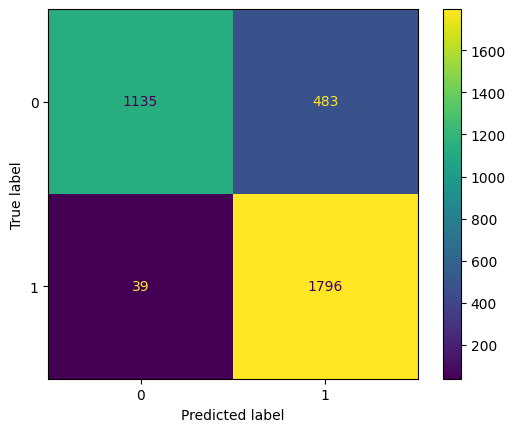

In [19]:
#it is possible to plot the confusion matrix 
#compute confusion matrix
cm = confusion_matrix(test_label, test_pred)
plot_confusion_matrix(clf, test_X, test_label)
plt.show()

In [20]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_X)

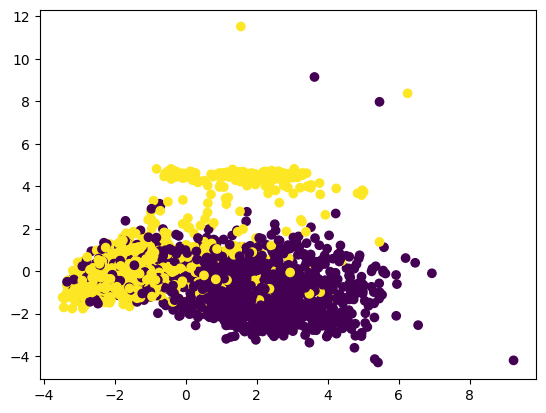

In [21]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label);

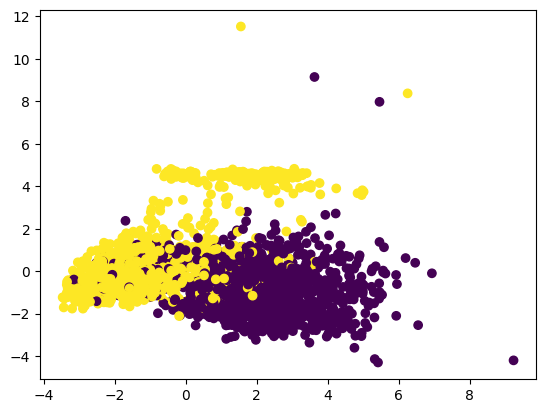

In [22]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred);

### Save Model

In [23]:
with open("models_checkpoints/svm_lang.bin", "wb") as f:
    pickle.dump(clf, f)

### Removed Lang Attribute for classification

In [24]:
train_set.head()

,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,...,it,ja,ko,nl,pl,pt,ru,sv,tr,zh
792459126,1504302145,4707,82.408367,18.085657,0.005109,0.919323,0.001494,0.0,0.000000,0.036355,...,0,0,0,0,0,0,0,0,0,0
2377028120,1552134038,33,61.344444,13.900000,0.000000,0.400000,0.022222,0.0,0.000000,0.022222,...,0,0,0,0,0,0,0,0,0,0
616755311,1498450898,61,60.652174,12.956522,0.000000,0.000000,0.144928,0.0,0.329212,0.014493,...,0,0,0,0,0,0,0,0,0,0
531252639,1490184205,53,78.121746,16.920011,0.005109,0.000000,0.000000,0.0,0.000000,0.015456,...,0,0,0,0,0,0,0,0,0,0
370960192,1473549515,53,65.340909,14.694444,0.005109,0.212915,0.070423,0.0,0.000000,0.003513,...,0,0,0,0,0,0,0,0,0,0


In [25]:
for lang in data.lang.unique():
    del train_set[lang]
    del test_set[lang]

In [26]:
train_set.head()

,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
792459126,1504302145,4707,82.408367,18.085657,0.005109,0.919323,0.001494,0.0,0.000000,0.036355,0.207367,0.223564,0.095618,3.839382
2377028120,1552134038,33,61.344444,13.900000,0.000000,0.400000,0.022222,0.0,0.000000,0.022222,0.209644,0.088072,0.055556,0.229061
616755311,1498450898,61,60.652174,12.956522,0.000000,0.000000,0.144928,0.0,0.329212,0.014493,0.119510,0.109286,0.000000,0.000000
531252639,1490184205,53,78.121746,16.920011,0.005109,0.000000,0.000000,0.0,0.000000,0.015456,0.129783,0.113792,0.002169,0.046524
370960192,1473549515,53,65.340909,14.694444,0.005109,0.212915,0.070423,0.0,0.000000,0.003513,0.071564,0.030537,0.018914,0.168176


In [27]:
scaler = StandardScaler()

train_X = scaler.fit_transform(train_set.values)
test_X = scaler.transform(test_set.values)

In [28]:
# make grid search

parameters = {
    'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 
    'C':[0.001, 0.1, 1, 10],
}

svc = SVC()

grid_search = GridSearchCV(svc, parameters)


grid_search.fit(train_X, train_label)

KeyboardInterrupt: 

In [ ]:
clf = grid_search.best_estimator_

In [ ]:
clf

In [ ]:
#predict on the test set
train_pred = clf.predict(train_X)
test_pred = clf.predict(test_X)

In [ ]:
print_metrics(train_label, train_pred, test_label, test_pred)

In [ ]:
#compute the performance of the model
report_scores(test_label,test_pred)

In [ ]:
# cross validation
scores = cross_validate(clf, train_X, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

In [ ]:
#it is possible to plot the confusion matrix 
#compute confusion matrix
cm = confusion_matrix(test_label, test_pred)
plot_confusion_matrix(clf, test_X, test_label)
plt.show() 

In [ ]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_X)

In [ ]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label);

In [ ]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred);

In [ ]:
with open("models_checkpoints/svm_no_lang.bin", "wb") as f:
    pickle.dump(clf, f)